In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_excel('D:\\dsa\\data11.xlsx')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [27]:
#Checking for null values

In [28]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [32]:
df= df.fillna(0)

In [33]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [34]:
# #preprocessing

In [7]:
df=pd.read_excel('D:\\dsa\\data11.xlsx')

In [17]:
df= df.fillna(0)

In [18]:

X = df.drop([ 'Classification'], axis=1)
y = df['Classification']

In [19]:
results_arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[],'Failure%':[],'Time_Taken':[]}

In [70]:
X = df.iloc[:, :].values
y = df.iloc[:, ].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
#1.logistic regression model

In [82]:
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time = time.time()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

end_time = time.time()

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)


results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)



Accuracy is 0.9666666666666667
precision is 0.9666666666666667
recall is 0.9666666666666667
f1_score is 0.9666666666666667
[[10  0  0]
 [ 1  8  0]
 [ 0  0 11]]


In [43]:
# #2.KNN

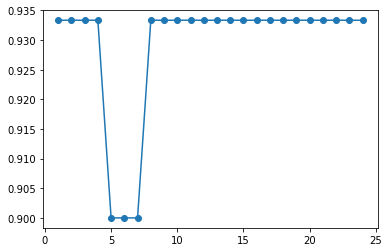

In [44]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
start_time = time.time()
neighbors=np.arange(1,25)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')

In [45]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
end_time = time.time()

In [80]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)


Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [49]:
#3.Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
end_time = time.time()

In [79]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)


Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [53]:
#4.SVM

In [54]:
from sklearn.svm import SVC
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()

In [75]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)


Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [57]:
#5. Random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
end_time = time.time()

In [81]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)


Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [86]:
#  From analysing these models  KNN, Decision Tree, SVM,Random forest classifierhas accuracy is 100%.